In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [4]:
def warn1(*args,**kwargs):
    pass
warnings.warn=warn1

In [5]:
EQ1=pd.read_csv("Equifax_Consolidated.csv")

In [6]:
EQ1.head(2)

,consumer_id,archive_date,zip_code,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,...,UER_SW_032010,UER_SW_042010,UER_SW_052010,UER_SW_062010,UER_SW_072010,UER_SW_082010,UER_SW_092010,UER_SW_102010,UER_SW_112010,UER_SW_122010
0,21782510,201003,2122,99.0,17.0,9998.0,7.0,5.0,1.0,5.0,...,8.7,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8
1,21782510,201003,2122,99.0,17.0,9998.0,7.0,5.0,1.0,5.0,...,8.7,8.5,8.4,8.3,8.2,8.1,8.0,7.9,7.9,7.8


In [7]:
EQ1.dtypes

consumer_id              int64
archive_date             int64
zip_code                 int64
inquiries_12_months    float64
age_oldest_account     float64
                        ...   
UER_SW_082010          float64
UER_SW_092010          float64
UER_SW_102010          float64
UER_SW_112010          float64
UER_SW_122010          float64
Length: 90, dtype: object

In [8]:
EQ1.shape
#EQ1.columns

(106876, 90)

In [9]:
EQ1=EQ1.drop_duplicates()

In [10]:
EQ1.shape

(106876, 90)

In [11]:
EQ1.info

<bound method DataFrame.info of         consumer_id  archive_date  zip_code  inquiries_12_months  \
0          21782510        201003      2122                 99.0   
1          21782510        201003      2122                 99.0   
2          21782510        201003      2122                 99.0   
3          21782510        201004      2122                 99.0   
4          21782510        201004      2122                 99.0   
...             ...           ...       ...                  ...   
106871     13241945        201004     96379                  3.0   
106872     13241945        201004     96379                  3.0   
106873     13241945        201004     96379                  3.0   
106874      6038194        201005     96379                  0.0   
106875      6038194        201005     96379                  0.0   

        age_oldest_account  age_oldest_mortgage_account  age_newest_account  \
0                     17.0                       9998.0                 

In [12]:
#EQ1.isna().sum()
EQ1.isnull().sum()

consumer_id              0
archive_date             0
zip_code                 0
inquiries_12_months    579
age_oldest_account     579
                      ... 
UER_SW_082010            0
UER_SW_092010            0
UER_SW_102010            0
UER_SW_112010            0
UER_SW_122010            0
Length: 90, dtype: int64

In [13]:
EQ1.columns

Index(['consumer_id', 'archive_date', 'zip_code', 'inquiries_12_months',
       'age_oldest_account', 'age_oldest_mortgage_account',
       'age_newest_account', 'number_of_accounts',
       'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_accounts_past_due', 'total_past_due_amount', 'bankruptcy_flag',
       'foreclosure_flag', 'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'vantage_score_3', 'state', 'trade_id',
       'origination_date_open', 'origination_portfolio_type',
       'origination_product_category', 'origination_vantage_score3',
       'product_category', 'small_business_owner_flag', 'pim_score',
       'consumer_age', 'mortgage_indicator

In [14]:
EQ1=EQ1.drop(['consumer_id','archive_date','zip_code','trade_id','origination_date_open','small_business_owner_flag','deceased_consumer','status_category','date_reported', 'narrcode_1', 'narrcode_2', 'narrcode_3', 'narrcode_4','CITY', 'LATITUDE', 'LONGITUDE', 'COUNTY',
       'hpi_09', 'hpi_10', 'hpi_11', 'UER_0110_PER', 'UER_0210_PER',
       'UER_0310_PER', 'UER_0410_PER', 'UER_0510_PER', 'UER_0610_PER',
       'UER_0710_PER', 'UER_0810_PER', 'UER_0910_PER', 'UER_1010_PER',
       'UER_1110_PER', 'UER_1210_PER', 'GDP_2009', 'GDP_2010', 'GDP_2011',
       'UER_SW_012010', 'UER_SW_022010', 'UER_SW_032010', 'UER_SW_042010',
       'UER_SW_052010', 'UER_SW_062010', 'UER_SW_072010', 'UER_SW_082010',
       'UER_SW_092010', 'UER_SW_102010', 'UER_SW_112010'],axis=1)

In [15]:
EQ1.shape

(106876, 44)

In [16]:
EQ1.head(2)

,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,...,ecoa,rate_status,scheduled_payment_amount,date_of_last_activity,date_of_last_payment,actual_payment_amount,payment_frequency,account_type,activity_designator,UER_SW_122010
0,99.0,17.0,9998.0,7.0,5.0,1.0,5.0,0.0,98.0,98.0,...,I,1,0,NaN,NaN,NaN,NaN,12,NaN,7.8
1,99.0,17.0,9998.0,7.0,5.0,1.0,5.0,0.0,98.0,98.0,...,I,1,0,NaN,NaN,NaN,NaN,12,NaN,7.8


In [17]:
EQ1.isna().sum()

inquiries_12_months                                                          579
age_oldest_account                                                           579
age_oldest_mortgage_account                                                  579
age_newest_account                                                           579
number_of_accounts                                                           579
number_accounts_opened_within_12_months                                      579
number_accounts_always_satisfactory                                          579
number_accounts_major_derogatory                                             579
number_revolving_accts_greater_than_or_equal_to_50_percent_utilization       579
bankcard_accts_over_75_percent_utilization                                   579
number_accounts_past_due                                                     579
total_past_due_amount                                                        579
bankruptcy_flag             

In [18]:
EQ1.columns

Index(['inquiries_12_months', 'age_oldest_account',
       'age_oldest_mortgage_account', 'age_newest_account',
       'number_of_accounts', 'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_accounts_past_due', 'total_past_due_amount', 'bankruptcy_flag',
       'foreclosure_flag', 'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'vantage_score_3', 'state',
       'origination_portfolio_type', 'origination_product_category',
       'origination_vantage_score3', 'product_category', 'pim_score',
       'consumer_age', 'mortgage_indicator', 'terms', 'balance', 'high_credit',
       'monthly_payment', 'portfolio_type', 'transferred_sold_flag',
       'new_orig

In [19]:
EQ1=EQ1.drop(['date_of_last_activity',
       'date_of_last_payment', 'actual_payment_amount', 'payment_frequency',
       'account_type', 'activity_designator'],axis=1)

In [20]:
EQ1.isna().sum()

inquiries_12_months                                                        579
age_oldest_account                                                         579
age_oldest_mortgage_account                                                579
age_newest_account                                                         579
number_of_accounts                                                         579
number_accounts_opened_within_12_months                                    579
number_accounts_always_satisfactory                                        579
number_accounts_major_derogatory                                           579
number_revolving_accts_greater_than_or_equal_to_50_percent_utilization     579
bankcard_accts_over_75_percent_utilization                                 579
number_accounts_past_due                                                   579
total_past_due_amount                                                      579
bankruptcy_flag                                     

In [21]:
EQ1['origination_vantage_score3'].fillna(EQ1['origination_vantage_score3'].mean(),inplace=True)

In [22]:
EQ1.isna().sum()

inquiries_12_months                                                       579
age_oldest_account                                                        579
age_oldest_mortgage_account                                               579
age_newest_account                                                        579
number_of_accounts                                                        579
number_accounts_opened_within_12_months                                   579
number_accounts_always_satisfactory                                       579
number_accounts_major_derogatory                                          579
number_revolving_accts_greater_than_or_equal_to_50_percent_utilization    579
bankcard_accts_over_75_percent_utilization                                579
number_accounts_past_due                                                  579
total_past_due_amount                                                     579
bankruptcy_flag                                                 

In [23]:
EQ1.dropna(inplace=True)

In [24]:
EQ1.shape

(106297, 38)

In [25]:
EQ1.isna().sum()

inquiries_12_months                                                       0
age_oldest_account                                                        0
age_oldest_mortgage_account                                               0
age_newest_account                                                        0
number_of_accounts                                                        0
number_accounts_opened_within_12_months                                   0
number_accounts_always_satisfactory                                       0
number_accounts_major_derogatory                                          0
number_revolving_accts_greater_than_or_equal_to_50_percent_utilization    0
bankcard_accts_over_75_percent_utilization                                0
number_accounts_past_due                                                  0
total_past_due_amount                                                     0
bankruptcy_flag                                                           0
foreclosure_

In [26]:
EQ1['inquiries_12_months'].describe()

count    106297.000000
mean         23.119655
std          40.072369
min           0.000000
25%           1.000000
50%           2.000000
75%           7.000000
max          99.000000
Name: inquiries_12_months, dtype: float64

In [27]:
EQ1['inquiries_12_months'].head(20)

0     99.0
1     99.0
2     99.0
3     99.0
4     99.0
5     99.0
6     99.0
7     99.0
8     99.0
9      2.0
10     2.0
11    99.0
12     2.0
13     2.0
14     2.0
15    99.0
16     2.0
17     2.0
18     2.0
19     2.0
Name: inquiries_12_months, dtype: float64

In [28]:
EQ1['inquiries_12_months']=EQ1['inquiries_12_months'].replace(99,0)

In [29]:
EQ1['inquiries_12_months'].describe()

count    106297.000000
mean          1.624966
std           3.111822
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          97.000000
Name: inquiries_12_months, dtype: float64

In [30]:
X=EQ1['inquiries_12_months'].quantile(0.50)

In [31]:
X

1.0

In [32]:
EQ1=EQ1[EQ1['inquiries_12_months']<=10]

In [33]:
EQ1.shape

(105564, 38)

In [34]:
EQ1['inquiries_12_months'].describe()

count    105564.000000
mean          1.492166
std           1.887620
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          10.000000
Name: inquiries_12_months, dtype: float64

In [35]:
EQ1.describe()

,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,number_revolving_accts_greater_than_or_equal_to_50_percent_utilization,bankcard_accts_over_75_percent_utilization,...,consumer_age,mortgage_indicator,terms,balance,high_credit,monthly_payment,transferred_sold_flag,new_origination_flag,scheduled_payment_amount,UER_SW_122010
count,105564.000000,105564.000000,105564.000000,105564.000000,105564.000000,105564.000000,105564.000000,105564.000000,105564.000000,105564.000000,...,105564.000000,105564.000000,105564.000000,1.055640e+05,1.055640e+05,105564.000000,105564.000000,105564.000000,105564.000000,105564.000000
mean,1.492166,220.232911,3774.301324,15.854174,21.016019,1.314511,18.989949,0.639233,9.131835,17.558003,...,3.540847,0.527424,32.009113,1.383767e+04,1.940643e+04,177.777017,0.007522,0.011652,162.557851,9.308093
std,1.887620,129.311759,4765.965460,48.394370,11.484961,1.792027,11.320935,1.989225,26.341310,36.811025,...,1.619624,0.499250,91.643040,5.635791e+04,6.062681e+04,931.111895,0.086400,0.107313,805.430658,1.855283
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,132.000000,105.000000,4.000000,12.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000e+00,1.300000e+03,0.000000,0.000000,0.000000,0.000000,8.000000
50%,1.000000,199.000000,168.000000,9.000000,20.000000,1.000000,17.000000,0.000000,1.000000,0.000000,...,4.000000,1.000000,0.000000,4.420000e+02,4.500000e+03,19.000000,0.000000,0.000000,15.000000,9.400000
75%,2.000000,292.000000,9998.000000,20.000000,28.000000,2.000000,26.000000,0.000000,2.000000,2.000000,...,5.000000,1.000000,0.000000,4.510000e+03,1.240000e+04,111.000000,0.000000,0.000000,100.000000,10.500000
max,10.000000,9997.000000,9998.000000,9997.000000,97.000000,97.000000,97.000000,97.000000,98.000000,98.000000,...,7.000000,1.000000,1188.000000,2.111154e+06,2.200000e+06,200070.000000,1.000000,1.000000,200675.000000,16.000000


In [36]:
EQ2=pd.read_csv("ALG_TREE.csv")

In [37]:
EQ2.describe()

,consumer_id,archive_date,zip_code,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,...,UER_SW_042010,UER_SW_052010,UER_SW_062010,UER_SW_072010,UER_SW_082010,UER_SW_092010,UER_SW_102010,UER_SW_112010,UER_SW_122010,dec_score
count,8.949300e+04,89493.000000,89493.000000,89493.000000,89493.000000,89493.000000,89493.000000,89493.000000,89493.000000,89493.000000,...,89493.000000,89493.000000,89493.000000,89493.000000,89493.00000,89493.000000,89493.000000,89493.000000,89493.000000,89493.000000
mean,1.205192e+07,201003.989854,49916.121853,1.455410,221.284849,77.197256,14.139005,20.474886,1.239784,18.811482,...,9.760480,9.639408,9.536701,9.472332,9.43860,9.439412,9.416625,9.364455,9.299198,3.763892
std,6.975978e+06,0.815301,29916.230852,1.975901,124.256154,82.624025,14.601945,10.863990,1.377378,10.759906,...,1.919126,1.903862,1.888906,1.876041,1.86426,1.874895,1.875487,1.851698,1.857223,1.343287
min,1.207000e+03,201003.000000,610.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,5.961373e+06,201003.000000,23838.000000,0.000000,132.000000,0.000000,4.000000,12.000000,0.000000,11.000000,...,8.500000,8.400000,8.300000,8.200000,8.10000,8.200000,8.100000,8.100000,8.000000,3.000000
50%,1.191648e+07,201004.000000,47150.000000,1.000000,201.000000,68.000000,9.000000,19.000000,1.000000,17.000000,...,9.800000,9.600000,9.500000,9.400000,9.40000,9.400000,9.400000,9.500000,9.400000,4.000000
75%,1.795100e+07,201005.000000,77575.000000,2.000000,296.000000,136.000000,19.000000,27.000000,2.000000,26.000000,...,10.900000,10.800000,10.700000,10.600000,10.50000,10.400000,10.500000,10.500000,10.500000,5.000000
max,2.448117e+07,201005.000000,99929.000000,20.000000,753.000000,529.000000,91.000000,51.000000,6.000000,51.000000,...,16.900000,17.000000,16.800000,16.600000,16.30000,16.000000,15.900000,15.900000,16.000000,5.000000


In [38]:
EQ2.columns

Index(['consumer_id', 'archive_date', 'zip_code', 'inquiries_12_months',
       'age_oldest_account', 'age_oldest_mortgage_account',
       'age_newest_account', 'number_of_accounts',
       'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_accounts_past_due', 'total_past_due_amount', 'bankruptcy_flag',
       'foreclosure_flag', 'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'vantage_score_3', 'state', 'trade_id',
       'origination_date_open', 'origination_portfolio_type',
       'origination_product_category', 'origination_vantage_score3',
       'product_category', 'pim_score', 'consumer_age', 'mortgage_indicator',
       'deceased_consumer', 'term

In [39]:
EQ2=EQ2.drop(['consumer_id','archive_date','zip_code','trade_id','origination_date_open','deceased_consumer','status_category','date_reported', 'narrcode_1', 'narrcode_2', 'narrcode_3', 'narrcode_4','CITY', 'LATITUDE', 'LONGITUDE', 'COUNTY',
       'hpi_09', 'hpi_10', 'hpi_11', 'UER_0110_PER', 'UER_0210_PER','account_type',
       'UER_0310_PER', 'UER_0410_PER', 'UER_0510_PER', 'UER_0610_PER',
       'UER_0710_PER', 'UER_0810_PER', 'UER_0910_PER', 'UER_1010_PER',
       'UER_1110_PER', 'UER_1210_PER', 'GDP_2009', 'GDP_2010', 'GDP_2011',
       'UER_SW_012010', 'UER_SW_022010', 'UER_SW_032010', 'UER_SW_042010',
       'UER_SW_052010', 'UER_SW_062010', 'UER_SW_072010', 'UER_SW_082010',
       'UER_SW_092010', 'UER_SW_102010', 'UER_SW_112010'],axis=1)

In [40]:
EQ2.columns

Index(['inquiries_12_months', 'age_oldest_account',
       'age_oldest_mortgage_account', 'age_newest_account',
       'number_of_accounts', 'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_accounts_past_due', 'total_past_due_amount', 'bankruptcy_flag',
       'foreclosure_flag', 'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'vantage_score_3', 'state',
       'origination_portfolio_type', 'origination_product_category',
       'origination_vantage_score3', 'product_category', 'pim_score',
       'consumer_age', 'mortgage_indicator', 'terms', 'balance', 'high_credit',
       'monthly_payment', 'portfolio_type', 'transferred_sold_flag',
       'new_orig

In [41]:
EQ2.isna().sum()

inquiries_12_months                                                       0
age_oldest_account                                                        0
age_oldest_mortgage_account                                               0
age_newest_account                                                        0
number_of_accounts                                                        0
number_accounts_opened_within_12_months                                   0
number_accounts_always_satisfactory                                       0
number_accounts_major_derogatory                                          0
number_revolving_accts_greater_than_or_equal_to_50_percent_utilization    0
bankcard_accts_over_75_percent_utilization                                0
number_accounts_past_due                                                  0
total_past_due_amount                                                     0
bankruptcy_flag                                                           0
foreclosure_

In [42]:
#######Linear/Multi Regression #########################

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
X=EQ2.drop(['vantage_score_3','state'],axis=1)

In [45]:
Y=EQ2['vantage_score_3']

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=100)

In [47]:
reg=LinearRegression()

In [48]:
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
reg.score(X_train,Y_train)

0.9472507166824468

In [51]:
X_train.shape

(62645, 37)

In [52]:
reg.coef_

array([-6.18228786e-01,  2.65416816e-02,  4.30389466e-03,  5.19800921e-02,
       -1.15746553e+00,  2.74910758e-02,  1.17138178e+00,  1.40499790e+00,
       -1.27676355e+00, -2.09448188e+00, -9.87170979e+00, -5.19206853e-04,
       -3.55407035e+00, -7.42714265e+00, -1.87889596e+00, -1.54661974e-04,
        7.53949265e-01, -2.43101364e+00,  8.46282660e-01, -1.06677061e-01,
        5.88637614e-02,  6.93273659e-02,  2.04680791e-02,  1.60937190e+00,
        9.75867359e-01,  1.58638844e-02, -1.96013203e-04,  1.25884609e-04,
       -9.49071915e-03,  3.02942670e-01, -5.40658942e-01, -2.25752747e+00,
        7.45411326e-01, -4.29986195e+00,  4.49476634e-03, -2.42688619e-01,
        5.31896837e+01])

In [53]:
reg.rank_

37

In [54]:
reg.singular_

array([3.09159016e+06, 1.13925083e+06, 3.68860794e+05, 1.84412904e+05,
       3.39909678e+04, 2.71339588e+04, 2.00633664e+04, 1.77816371e+04,
       9.43053462e+03, 8.08971257e+03, 4.22504778e+03, 3.30345537e+03,
       2.68951247e+03, 1.12761256e+03, 5.76424374e+02, 5.30505836e+02,
       4.64342379e+02, 4.58161425e+02, 4.14215585e+02, 3.40032903e+02,
       3.00543991e+02, 2.72789159e+02, 2.54868837e+02, 2.41260729e+02,
       2.32272371e+02, 1.82556573e+02, 1.54215577e+02, 1.52535619e+02,
       1.30079286e+02, 1.28266294e+02, 1.25150207e+02, 8.24162694e+01,
       5.55319087e+01, 4.28125623e+01, 2.62123904e+01, 2.10168014e+01,
       2.01886374e+01])

In [55]:
reg.intercept_

470.2319745040527

In [56]:
pred_test=reg.predict(X_test)

In [57]:
reg.score(X_test,Y_test)

0.9471346467149762

In [58]:
pred_test

array([793.48063736, 603.19381279, 605.80618607, ..., 540.34086634,
       799.52078105, 737.99841727])

In [61]:
REsidual_SS=sum((Y_test-pred_test)**2)
Total_SS = sum((Y_test-np.mean(Y_test))**2)
r_squared = 1 - (float(REsidual_SS))/Total_SS
r_squared

0.947134646714976

In [62]:
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [63]:
adjusted_r_squared

0.9470616881893682

In [64]:
import sklearn

In [66]:
print("MAE:",sklearn.metrics.mean_absolute_error(pred_test,Y_test))
print("MSE",sklearn.metrics.mean_squared_error(pred_test,Y_test))
print("RMSE",np.sqrt(sklearn.metrics.mean_squared_error(pred_test,Y_test)))

MAE: 16.78801483165098
MSE 448.3233130798685
RMSE 21.173646664660023


In [61]:
##########Polynomial Regression###############

In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
poly1=PolynomialFeatures(degree=2)

In [76]:
X_train_poly = poly1.fit_transform(X_train)

In [82]:
X_train_poly

array([[  1.  ,   1.  , 392.  , ...,  90.25,  47.5 ,  25.  ],
       [  1.  ,   0.  , 298.  , ...,  70.56,  42.  ,  25.  ],
       [  1.  ,   0.  , 252.  , ...,  64.  ,  16.  ,   4.  ],
       ...,
       [  1.  ,   0.  , 271.  , ...,  75.69,  43.5 ,  25.  ],
       [  1.  ,   6.  , 319.  , ..., 146.41,  60.5 ,  25.  ],
       [  1.  ,   1.  , 276.  , ..., 100.  ,  50.  ,  25.  ]])

In [77]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

In [79]:
y_test_predict = poly_model.predict(poly1.fit_transform(X_test))

In [84]:
print("MAE:",sklearn.metrics.mean_absolute_error(y_train_predicted,Y_train))
print("MSE",sklearn.metrics.mean_squared_error(y_train_predicted,Y_train))
print("RMSE",np.sqrt(sklearn.metrics.mean_squared_error(y_train_predicted,Y_train)))

MAE: 14.023524730382242
MSE 321.0727671894059
RMSE 17.918503486324017


In [83]:
print("MAE:",sklearn.metrics.mean_absolute_error(y_test_predict,Y_test))
print("MSE",sklearn.metrics.mean_squared_error(y_test_predict,Y_test))
print("RMSE",np.sqrt(sklearn.metrics.mean_squared_error(y_test_predict,Y_test)))

MAE: 14.226005057421897
MSE 332.08020326843905
RMSE 18.223067888487904


In [65]:
################Lasso/Ridged/Elasticnet Regression#####################

In [85]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [99]:
#mod_reg=Lasso()
mod_reg1=Ridge()
#mod_reg2=ElasticNet()

In [100]:
#mod_reg.fit(X_train,Y_train)
mod_reg1.fit(X_train,Y_train)
#mod_reg2.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [101]:
#y_train_predicted = mod_reg.predict(X_train)
y_train_predicted = mod_reg1.predict(X_train)
#y_train_predicted = mod_reg2.predict(X_train)

In [102]:
#mod_reg.score(X_train,Y_train)
mod_reg1.score(X_train,Y_train)
#mod_reg2.score(X_train,Y_train)

0.9472507162728074

In [103]:
#Y_pred_lasso=mod_reg.predict(X_test)
Y_pred_Ridge=mod_reg1.predict(X_test)
#Y_pred_Elastic=mod_reg2.predict(X_test)

In [91]:
#mod_reg.score(X_test,Y_test)
mod_reg1.score(X_test,Y_test)
#mod_reg2.score(X_test,Y_test)

0.9458087512407043

In [92]:
mod_reg.coef_
#mod_reg1.coef_
#mod_reg2.coef_

array([-4.39879464e-01,  3.45538677e-02, -3.57006880e-04,  5.25859045e-02,
       -8.29287884e-01, -0.00000000e+00,  8.29570663e-01,  0.00000000e+00,
       -1.63755076e+00, -2.06455458e-01, -7.92831326e+00, -1.22186807e-03,
       -0.00000000e+00, -0.00000000e+00, -1.00247855e+00, -1.41427966e-03,
        4.59619415e-01, -0.00000000e+00,  4.25324840e-02, -6.94912161e-02,
        6.76839770e-02, -0.00000000e+00,  0.00000000e+00,  1.04749908e+00,
       -0.00000000e+00,  5.82385121e-03, -2.26453936e-04,  1.55236605e-04,
       -1.20352716e-02,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.93032974e+00,  3.21881215e-05, -0.00000000e+00,
        5.38022638e+01])

In [93]:
Y_pred_lasso
#Y_pred_Ridge
#Y_pred_Elastic

array([792.79292446, 606.44932381, 603.16640685, ..., 542.27595314,
       797.34846425, 735.91186571])

In [94]:
mod_reg.intercept_
#mod_reg1.intercept_
#mod_reg2.intercept_

462.15772074324445

In [97]:
print("MAE:",sklearn.metrics.mean_absolute_error(y_train_predicted,Y_train))
print("MSE",sklearn.metrics.mean_squared_error(y_train_predicted,Y_train))
print("RMSE",np.sqrt(sklearn.metrics.mean_squared_error(y_train_predicted,Y_train)))

MAE: 17.086294968074125
MSE 465.31357846551737
RMSE 21.571128354017954


In [96]:
print("MAE:",sklearn.metrics.mean_absolute_error(Y_pred_lasso,Y_test))
print("MSE",sklearn.metrics.mean_squared_error(Y_pred_lasso,Y_test))
print("RMSE",np.sqrt(sklearn.metrics.mean_squared_error(Y_pred_lasso,Y_test)))

MAE: 16.95896379032599
MSE 459.56753665704366
RMSE 21.437526365162647


**Observation**
- difference:
-   l1_ratiofloat, default=0.5

In [ ]:
#################Logistic Regression####################

In [106]:
Log1=pd.read_csv("CLS_TREE.csv")

In [107]:
Log1.head(2)

,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,...,consumer_age,high_credit,terms,monthly_payment,ecoa,hpi_11,UER_1210_PER,GDP_2011,UER_SW_122010,Target
0,0,17,0,7,5,1,5,0,0,0,...,1,3500,0,70,1,357.74,7.5,61769,7.8,MOD
1,0,17,0,7,5,1,5,0,0,0,...,1,2000,0,40,1,357.74,7.5,61769,7.8,MOD


In [108]:
X=Log1.drop("Target",axis=1)

In [109]:
Y=Log1["Target"]

In [110]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
Log_reg=LogisticRegression()

In [113]:
Log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
P_test=Log_reg.predict(X_test)

In [115]:
P_test

array(['VGOOD', 'MOD', 'GOOD', ..., 'VGOOD', 'VGOOD', 'VGOOD'],
      dtype=object)

In [116]:
Log_reg.score(X_train,Y_train)

0.6430886132528774

In [117]:
Log_reg.score(X_test,Y_test)

0.6423394949398206

In [118]:
from sklearn.metrics import confusion_matrix,classification_report

In [119]:
cm=confusion_matrix(P_test,Y_test)

In [120]:
cm

array([[ 9690,  5262,   604,  3219],
       [ 1310,  4393,  1806,    72],
       [   21,   390,  1215,     0],
       [ 8117,  1575,    30, 24942]], dtype=int64)

In [121]:
cm1=classification_report(P_test,Y_test)

In [122]:
print(cm1)

              precision    recall  f1-score   support

        GOOD       0.51      0.52      0.51     18775
         MOD       0.38      0.58      0.46      7581
        Risk       0.33      0.75      0.46      1626
       VGOOD       0.88      0.72      0.79     34664

   micro avg       0.64      0.64      0.64     62646
   macro avg       0.53      0.64      0.56     62646
weighted avg       0.69      0.64      0.66     62646



In [123]:
Log_reg.classes_

array(['GOOD', 'MOD', 'Risk', 'VGOOD'], dtype=object)

In [124]:
Log_reg.coef_

array([[ 8.87637716e-04, -3.50185528e-03, -3.39844459e-04,
        -6.44437382e-03,  7.93746907e-03,  9.17934118e-04,
         7.18783258e-03,  1.58832194e-04, -1.08964805e-03,
        -4.37995909e-04,  2.23376295e-04,  3.53997143e-06,
        -3.94728569e-04, -3.01127351e-04,  1.44460339e-03,
        -3.31987696e-03, -1.89640587e-03, -1.31131683e-05,
        -3.09512803e-04,  2.40701542e-03,  3.15420598e-04,
        -1.10570308e-04, -1.41141901e-03, -8.06925875e-07,
         4.63428294e-04],
       [ 1.02870943e-01, -2.69107077e-03,  2.69869106e-04,
         1.65405748e-03,  1.37981002e-01,  7.18532775e-03,
        -1.15778324e-01, -6.68371622e-03, -3.26846489e-02,
         1.03092026e-04,  4.19499672e-03,  2.76611296e-03,
         7.25578136e-05,  3.17230156e-02, -9.93242393e-03,
        -3.05428703e-02, -1.23586740e-02, -5.30325463e-05,
         1.33649838e-03,  4.69113972e-03, -1.38657666e-02,
         3.96912356e-05,  1.86840334e-02, -1.11341462e-05,
        -1.62504821e-02],
    

In [125]:
Log_reg.intercept_

array([ 3.46018914e-05, -4.43849709e-03, -7.29708504e-03, -4.38230528e-02])

In [ ]:
ROC Curve

In [161]:
##################Decision Trees ################################################

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [163]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [137]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [138]:
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

In [139]:
max_features=["auto","sqrt"]

In [140]:
min_samples_split=[2,5,10,15,100]

In [141]:
min_samples_leaf=[1,2,5,10]

In [142]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
random_grid={'n_estimators':n_estimators,
             'max_depth':max_depth,
             'max_features':max_features,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [148]:
rf_random=RandomizedSearchCV(clf,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=30,n_jobs=-1)

In [166]:
clf=DecisionTreeClassifier(max_depth=4,random_state=200)
#Default:gini

In [167]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [168]:
clf.score(X_test,Y_test)

0.6136864285030169

In [169]:
z=clf.predict_proba(X_test)[:,0]
z

array([0.1694291 , 0.4179357 , 0.4179357 , ..., 0.1694291 , 0.1694291 ,
       0.33044059])

In [170]:
import pydotplus,os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [171]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["GOOD","MOD","Risk","VGOOD"],
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [172]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [173]:
from IPython.display import Image

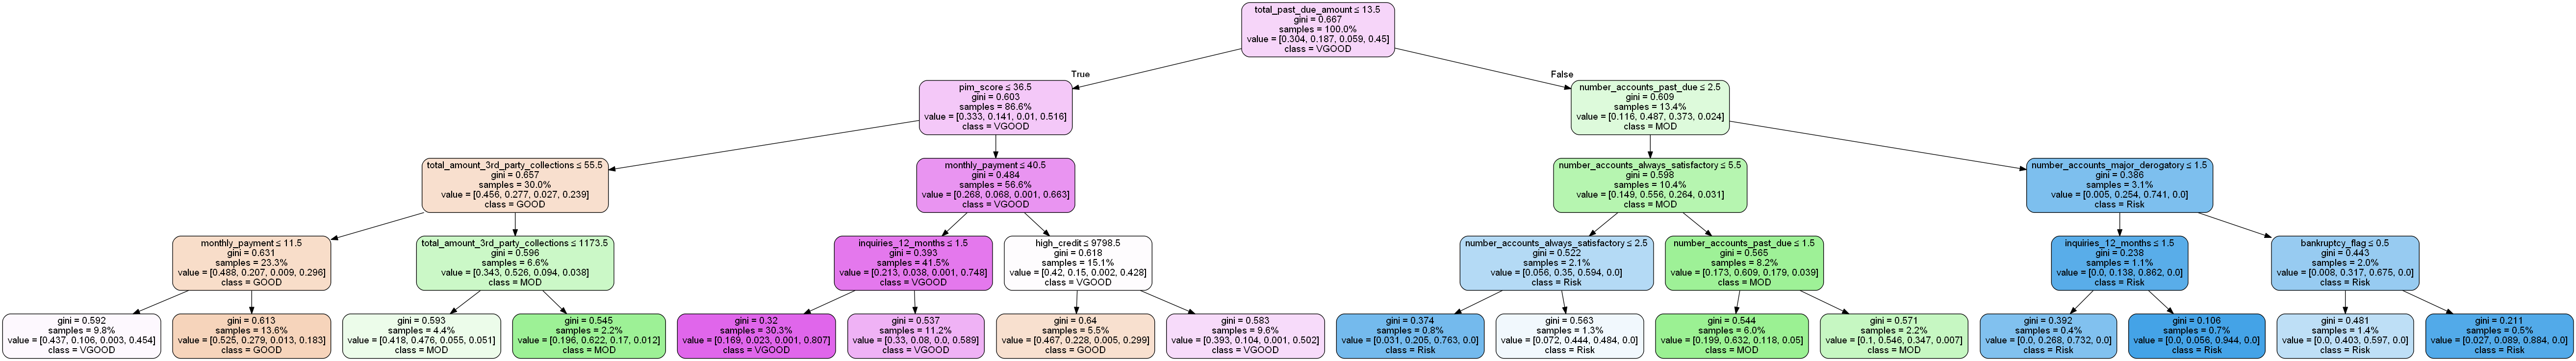

In [174]:
Image(graph.create_png())

In [177]:
from sklearn import model_selection
mod1=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})

In [178]:
mod1.fit(X_train,Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [179]:
mod1.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [180]:
mod1.best_score_

0.64707416098633

In [ ]:
#################### Decision Tree Regressor #################################

In [185]:
from sklearn.tree import DecisionTreeRegressor

In [186]:
X=EQ2.drop(['vantage_score_3','state'],axis=1)

In [187]:
Y=EQ2["vantage_score_3"]

In [188]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [208]:
DR=DecisionTreeRegressor(max_depth=3)

In [209]:
DR.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [210]:
Y_pred=rf_random.predict(X_test)

In [211]:
Y_pred

array([781.        , 622.8       , 551.33333333, ..., 718.5       ,
       822.91304348, 718.        ])

In [212]:
DR.score(X_train,Y_train)

0.9455263642094807

In [213]:
DR.score(X_test,Y_test)

0.9446414841680515

In [214]:
DR.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.51216772e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.31844475e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.90530338e-01])

In [215]:
Z=pd.DataFrame(pd.Series(DR.feature_importances_,index=X.columns).sort_values(ascending=False).head().reset_index())

In [216]:
Z=Z.rename(columns={'index':"Feature_IMP",0:"Weight"})

In [217]:
Z

,Feature_IMP,Weight
0,dec_score,0.990530
1,origination_vantage_score3,0.009318
2,number_revolving_accts_greater_than_or_equal_t...,0.000151
3,age_oldest_mortgage_account,0.000000
4,age_newest_account,0.000000


In [218]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [219]:
dot_data = tree.export_graphviz(DR, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

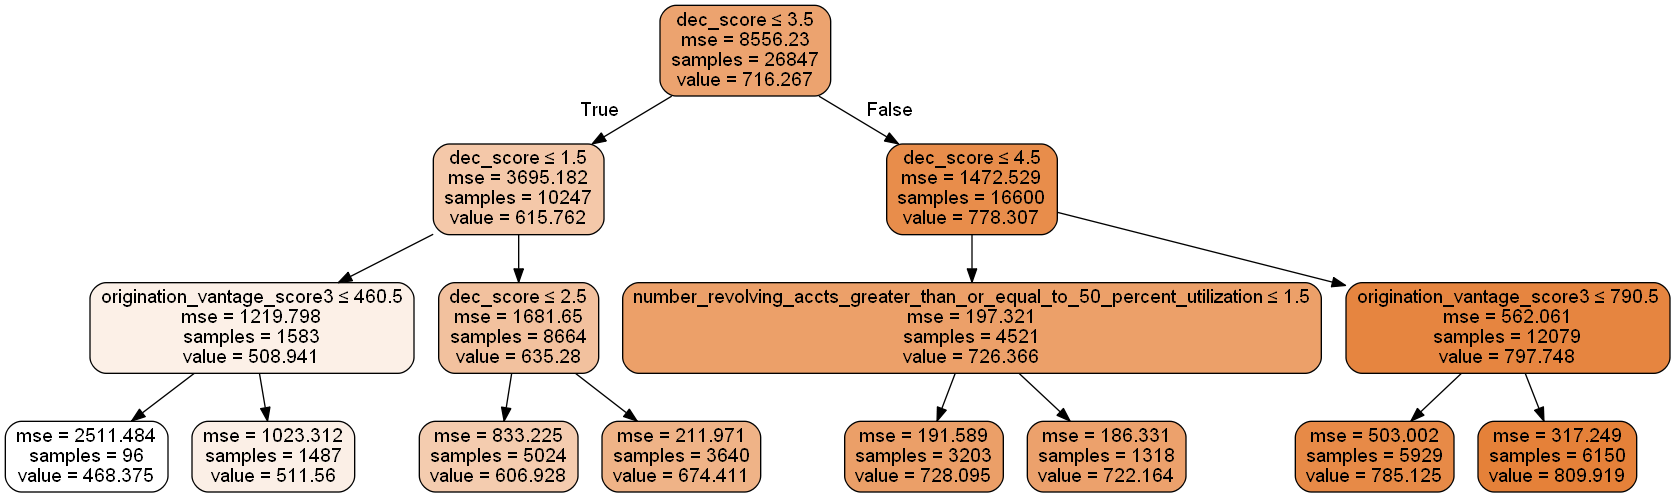

In [220]:
from IPython.display import Image
Image(graph.create_png())

In [221]:
###############  Bagging Tree Classifier ########################

In [222]:
from sklearn.ensemble import BaggingClassifier

In [223]:
Bag1=pd.read_csv("CLS_TREE.csv")

In [224]:
Bag1.head(2)

,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,...,consumer_age,high_credit,terms,monthly_payment,ecoa,hpi_11,UER_1210_PER,GDP_2011,UER_SW_122010,Target
0,0,17,0,7,5,1,5,0,0,0,...,1,3500,0,70,1,357.74,7.5,61769,7.8,MOD
1,0,17,0,7,5,1,5,0,0,0,...,1,2000,0,40,1,357.74,7.5,61769,7.8,MOD


In [225]:
X=Bag1.drop("Target",axis=1)

In [226]:
Y=Bag1["Target"]

In [227]:
from sklearn.tree import  DecisionTreeClassifier

In [228]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [229]:
Bmod=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,base_estimator=DecisionTreeClassifier())
Bmod

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [230]:
Bmod.fit(X_train,Y_train)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [231]:
Bmod.oob_score_

0.8559988080604909

In [232]:
Bmod.score(X_test,Y_test)

0.8795294192765699

In [231]:
for w in range(10,300,20):
    Bmod=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=200,base_estimator=DecisionTreeClassifier())
    Bmod.fit(X_train,Y_train)
    oob=Bmod.oob_score_
    print('For Nestimators='+str(w))
    print('oob score='+str(oob))
    print('#################')

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For Nestimators=10
oob score=0.814280925243044
#################
For Nestimators=30
oob score=0.8636719186501285
#################
For Nestimators=50
oob score=0.8748091034380006
#################
For Nestimators=70
oob score=0.8794278690356464
#################
For Nestimators=90
oob score=0.8812530264089098
#################
For Nestimators=110
oob score=0.8815510112861772
#################
For Nestimators=130
oob score=0.8823704696986628
#################
For Nestimators=150
oob score=0.8821097329310538
#################
For Nestimators=170
oob score=0.8831899281111484
#################
For Nestimators=190
oob score=0.8837486497560249
#################
For Nestimators=210
oob score=0.8847171006071441
#################
For Nestimators=230
oob score=0.8850523335940701
#################
For Nestimators=250
oob score=0.8850150854844117
#################
For Nestimators=270
oob score=0.8861325287741647
#################
For Nestimators=290
oob score=0.88624427310314
#################


In [44]:
Bmod=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=230,random_state=400,base_estimator=DecisionTreeClassifier())

In [45]:
Bmod.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=230, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [46]:
Bmod.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_f

In [47]:
Bmod.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1859118377, splitter='best')

In [48]:
Bmod.estimators_[0].feature_importances_

array([0.04540752, 0.08755276, 0.04163572, 0.0526387 , 0.05229637,
       0.01901133, 0.05327738, 0.01759714, 0.01688594, 0.10373422,
       0.00756163, 0.00115305, 0.03122676, 0.00960459, 0.01059578,
       0.12215364, 0.02453354, 0.05382032, 0.01256329, 0.06874026,
       0.00393603, 0.06893454, 0.01363872, 0.0472969 , 0.03420389])

In [60]:
sum_fea=[]
for i in Bmod.estimators_:
    sum_fea.append(i.feature_importances_)

In [61]:
sum_fea

[array([0.04540752, 0.08755276, 0.04163572, 0.0526387 , 0.05229637,
        0.01901133, 0.05327738, 0.01759714, 0.01688594, 0.10373422,
        0.00756163, 0.00115305, 0.03122676, 0.00960459, 0.01059578,
        0.12215364, 0.02453354, 0.05382032, 0.01256329, 0.06874026,
        0.00393603, 0.06893454, 0.01363872, 0.0472969 , 0.03420389]),
 array([4.13857475e-02, 9.36797643e-02, 4.88558248e-02, 5.91512794e-02,
        4.24103914e-02, 1.38976544e-02, 5.86375198e-02, 2.07895925e-02,
        1.50701536e-02, 1.05968087e-01, 7.54482708e-03, 1.02339279e-04,
        3.28819758e-02, 6.14607327e-03, 1.68898469e-02, 1.17075078e-01,
        2.11170459e-02, 4.86792801e-02, 1.07735242e-02, 7.37710483e-02,
        3.23287844e-03, 6.75872674e-02, 1.66509492e-02, 4.35491644e-02,
        3.41526875e-02]),
 array([0.04485464, 0.09763808, 0.04823589, 0.05314576, 0.05475935,
        0.01740888, 0.05516418, 0.01882632, 0.01466601, 0.10475367,
        0.00860861, 0.00081693, 0.0345569 , 0.00525421, 0.013659

In [62]:
sum_fea=np.mean(sum_fea,axis=0)

In [63]:
sum_fea

array([0.04069489, 0.08966883, 0.04783695, 0.05160033, 0.05123991,
       0.01713843, 0.05458467, 0.01812974, 0.01577603, 0.10294992,
       0.00911606, 0.00039311, 0.0343434 , 0.00822409, 0.01451563,
       0.11850774, 0.02566192, 0.04899549, 0.00958219, 0.07002953,
       0.00431642, 0.06674608, 0.0149557 , 0.04396439, 0.04102856])

In [70]:
feature_importance=pd.Series(sum_fea,X.columns).sort_values(ascending=False)

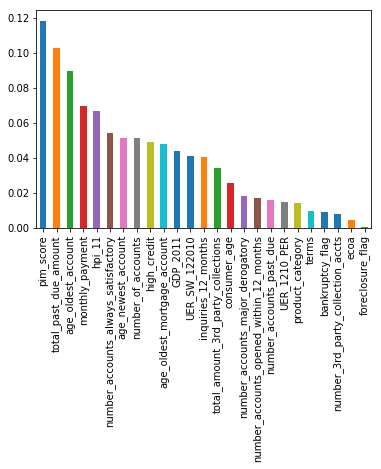

In [71]:
feature_importance.plot(kind='bar')

In [233]:
######################BaggingTree Regressor #################################

In [234]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [235]:
X=EQ2.drop(['vantage_score_3','state'],axis=1)

In [236]:
X.columns

Index(['inquiries_12_months', 'age_oldest_account',
       'age_oldest_mortgage_account', 'age_newest_account',
       'number_of_accounts', 'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_accounts_past_due', 'total_past_due_amount', 'bankruptcy_flag',
       'foreclosure_flag', 'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'origination_portfolio_type',
       'origination_product_category', 'origination_vantage_score3',
       'product_category', 'pim_score', 'consumer_age', 'mortgage_indicator',
       'terms', 'balance', 'high_credit', 'monthly_payment', 'portfolio_type',
       'transferred_sold_flag', 'new_origination_flag', 'ecoa', 'rate_status

In [237]:
Y=EQ2['vantage_score_3']

In [238]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [239]:
BmodR=BaggingRegressor(oob_score=True,n_estimators=30,n_jobs=-1,random_state=100,base_estimator=DecisionTreeRegressor())

In [240]:
BmodR.fit(X_train,Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=30, n_jobs=-1, oob_score=True,
         random_state=100, verbose=0, warm_start=False)

In [241]:
BmodR.oob_score_

0.9846710502406305

In [242]:
BmodR.score(X_test,Y_test)

0.9853380674521117

In [243]:
for wi in range(10,300,20):
    BmodR=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=wi,random_state=200,base_estimator=DecisionTreeRegressor())
    BmodR.fit(X_train,Y_train)
    oob=BmodR.oob_score_
    print('For Nestimators=' +str(wi))
    print('oob score='+str(oob))
    print('##############')

For Nestimators=10
oob score=0.32970359462420284
##############
For Nestimators=30
oob score=0.984874892584841
##############


KeyboardInterrupt: 

In [46]:
BmodR=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=290,random_state=800,base_estimator=DecisionTreeRegressor())

In [47]:
BmodR.fit(X_train,Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=290, n_jobs=-1, oob_score=True,
         random_state=800, verbose=0, warm_start=False)

In [48]:
BmodR.oob_score_

0.9867024125342447

In [49]:
BmodR.score(X_test,Y_test)

0.9861952876454769

In [52]:
BmodR.estimators_[0].feature_importances_

array([1.44969824e-03, 5.70208683e-03, 2.32844784e-03, 3.83497469e-03,
       1.98716480e-03, 6.71267440e-04, 3.59098501e-03, 7.70512206e-04,
       3.71098149e-03, 1.17995467e-03, 1.21668021e-03, 5.17393917e-03,
       1.19725193e-04, 6.06314541e-05, 6.64653330e-04, 1.71625473e-03,
       2.53165990e-03, 1.05054819e-03, 1.54925222e-04, 4.16040779e-04,
       1.38428487e-02, 4.00080971e-04, 2.03235741e-03, 1.33915882e-03,
       1.17036097e-04, 3.27531641e-04, 1.32376648e-03, 1.11854165e-03,
       6.19317855e-04, 9.58372880e-05, 1.81766006e-05, 5.84332686e-05,
       8.38081194e-05, 2.06947379e-04, 9.11624627e-04, 2.57915694e-03,
       9.36594245e-01])

In [70]:
Sum_feat=[]
for i in BmodR.estimators_:
    Sum_feat.append(i.feature_importances_)
    

In [71]:
Sum_feat=np.mean(Sum_feat,axis=0)

In [77]:
Sum_feat

array([1.87932937e-03, 5.97306871e-03, 2.56190857e-03, 3.23657832e-03,
       2.27121631e-03, 9.04380198e-04, 3.29228728e-03, 9.95210662e-04,
       3.84137049e-03, 1.09465332e-03, 1.30272232e-03, 4.24256956e-03,
       2.29541084e-04, 7.05114023e-05, 7.00124060e-04, 1.46145946e-03,
       2.14027411e-03, 9.15189505e-04, 1.54177367e-04, 5.16622038e-04,
       1.40507329e-02, 3.89539419e-04, 2.34946984e-03, 1.20702708e-03,
       2.20439862e-04, 2.65160625e-04, 1.10720086e-03, 1.22540563e-03,
       6.02765115e-04, 1.16733940e-04, 3.06064562e-05, 2.45109549e-05,
       1.28072609e-04, 3.93732973e-04, 5.96331499e-04, 2.86167061e-03,
       9.36647406e-01])

In [80]:
Sum_feat=pd.DataFrame(pd.Series(Sum_feat,index=X.columns)).reset_index()

In [81]:
Sum_feat

,index,0
0,inquiries_12_months,0.001879
1,age_oldest_account,0.005973
2,age_oldest_mortgage_account,0.002562
3,age_newest_account,0.003237
4,number_of_accounts,0.002271
5,number_accounts_opened_within_12_months,0.000904
6,number_accounts_always_satisfactory,0.003292
7,number_accounts_major_derogatory,0.000995
8,number_revolving_accts_greater_than_or_equal_t...,0.003841
9,bankcard_accts_over_75_percent_utilization,0.001095


In [94]:
Z=Sum_feat.rename(columns={'index':'Feature',0:'Weight'})

In [95]:
Z

,Feature,Weight
0,inquiries_12_months,0.001879
1,age_oldest_account,0.005973
2,age_oldest_mortgage_account,0.002562
3,age_newest_account,0.003237
4,number_of_accounts,0.002271
5,number_accounts_opened_within_12_months,0.000904
6,number_accounts_always_satisfactory,0.003292
7,number_accounts_major_derogatory,0.000995
8,number_revolving_accts_greater_than_or_equal_t...,0.003841
9,bankcard_accts_over_75_percent_utilization,0.001095


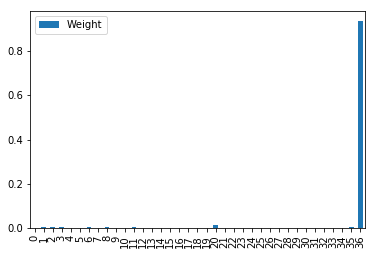

In [97]:
Z.plot(kind='bar')

In [244]:
################# Random Forest ####################################

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
Log1=pd.read_csv("CLS_TREE.csv")

In [247]:
Log1.head(2)

,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,...,consumer_age,high_credit,terms,monthly_payment,ecoa,hpi_11,UER_1210_PER,GDP_2011,UER_SW_122010,Target
0,0,17,0,7,5,1,5,0,0,0,...,1,3500,0,70,1,357.74,7.5,61769,7.8,MOD
1,0,17,0,7,5,1,5,0,0,0,...,1,2000,0,40,1,357.74,7.5,61769,7.8,MOD


In [248]:
X=Log1.drop("Target",axis=1)

In [249]:
Y=Log1["Target"]

In [250]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [251]:
RmodC=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [252]:
RmodC.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [253]:
RmodC.oob_score_

0.9048683279323574

In [254]:
RmodC.score(X_test,Y_test)

0.9145835328672222

In [255]:
for wi in range(10,300,20):
    RmodC=RandomForestClassifier(n_estimators=wi,oob_score=True,n_jobs=-1,random_state=400)
    RmodC.fit(X_train,Y_train)
    oob=RmodC.oob_score_
    print('For Nestimator='+str(wi))
    print('oob score='+str(oob))
    print('############')

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For Nestimator=10
oob score=0.8351771147614259
############
For Nestimator=30
oob score=0.8933959101575595
############
For Nestimator=50
oob score=0.9015904942824152
############
For Nestimator=70
oob score=0.9041233657391887
############
For Nestimator=90
oob score=0.9055015457965508
############
For Nestimator=110
oob score=0.9072894550601557
############
For Nestimator=130
oob score=0.9087793794464931
############
For Nestimator=150
oob score=0.9097478302976124
############
For Nestimator=170
oob score=0.9104182962714642
############
For Nestimator=190
oob score=0.9100458151748799
############


KeyboardInterrupt: 

In [114]:
RmodC=RandomForestClassifier(oob_score=True,n_estimators=210,random_state=400,n_jobs=-1)

In [115]:
RmodC.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=210, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [117]:
RmodC.score(X_test,Y_test)

0.916467132777831

In [118]:
RmodC.oob_score_

0.9107162811487317

In [119]:
RmodC.feature_importances_

array([0.03976686, 0.10124955, 0.04744847, 0.05106787, 0.05760558,
       0.02344994, 0.05939977, 0.02494592, 0.04446968, 0.05319433,
       0.01071954, 0.00062888, 0.03461652, 0.0237272 , 0.01824104,
       0.08381454, 0.03523693, 0.04574078, 0.00985673, 0.06321845,
       0.00479287, 0.06151893, 0.01476385, 0.04696779, 0.04355799])

In [120]:
best_fea=pd.DataFrame(pd.Series(RmodC.feature_importances_,index=X.columns)).reset_index()

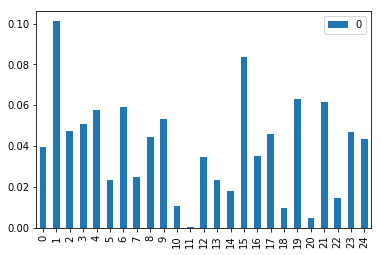

In [122]:
best_fea.plot(kind='bar')

In [123]:
######################## Randomforest Regressor #####################

In [125]:
EQ2=pd.read_csv("ALG_TREE.csv")

In [126]:
EQ2=EQ2.drop(['consumer_id','archive_date','zip_code','trade_id','origination_date_open','deceased_consumer','status_category','date_reported', 'narrcode_1', 'narrcode_2', 'narrcode_3', 'narrcode_4','CITY', 'LATITUDE', 'LONGITUDE', 'COUNTY',
       'hpi_09', 'hpi_10', 'hpi_11', 'UER_0110_PER', 'UER_0210_PER','account_type',
       'UER_0310_PER', 'UER_0410_PER', 'UER_0510_PER', 'UER_0610_PER',
       'UER_0710_PER', 'UER_0810_PER', 'UER_0910_PER', 'UER_1010_PER',
       'UER_1110_PER', 'UER_1210_PER', 'GDP_2009', 'GDP_2010', 'GDP_2011',
       'UER_SW_012010', 'UER_SW_022010', 'UER_SW_032010', 'UER_SW_042010',
       'UER_SW_052010', 'UER_SW_062010', 'UER_SW_072010', 'UER_SW_082010',
       'UER_SW_092010', 'UER_SW_102010', 'UER_SW_112010'],axis=1)

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
X=EQ2.drop(['vantage_score_3','state'],axis=1)

In [129]:
X.columns

Index(['inquiries_12_months', 'age_oldest_account',
       'age_oldest_mortgage_account', 'age_newest_account',
       'number_of_accounts', 'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_accounts_past_due', 'total_past_due_amount', 'bankruptcy_flag',
       'foreclosure_flag', 'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'origination_portfolio_type',
       'origination_product_category', 'origination_vantage_score3',
       'product_category', 'pim_score', 'consumer_age', 'mortgage_indicator',
       'terms', 'balance', 'high_credit', 'monthly_payment', 'portfolio_type',
       'transferred_sold_flag', 'new_origination_flag', 'ecoa', 'rate_status

In [130]:
Y=EQ2['vantage_score_3']

In [132]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [134]:
RmodR=RandomForestRegressor(oob_score=True,n_estimators=30,n_jobs=-1,random_state=100)

In [135]:
RmodR.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=True, random_state=100, verbose=0, warm_start=False)

In [137]:
RmodR.oob_score_

0.9845524072250726

In [138]:
RmodR.score(X_test,Y_test)

0.985339626862152

In [139]:
for wi in range(10,300,20):
    RmodR=RandomForestRegressor(oob_score=True,n_jobs=-1,n_estimators=wi,random_state=200)
    RmodR.fit(X_train,Y_train)
    oob=RmodR.oob_score_
    print('For Nestimators=' +str(wi))
    print('oob score='+str(oob))
    print('##############')

For Nestimators=10
oob score=0.3298574881657492
##############
For Nestimators=30
oob score=0.9847352177462012
##############
For Nestimators=50
oob score=0.9855372838834194
##############
For Nestimators=70
oob score=0.9860307327072036
##############
For Nestimators=90
oob score=0.9862506688248982
##############
For Nestimators=110
oob score=0.9863774534246934
##############
For Nestimators=130
oob score=0.9864513702218859
##############
For Nestimators=150
oob score=0.9865251999627007
##############
For Nestimators=170
oob score=0.9865855473456866
##############
For Nestimators=190
oob score=0.9866353713651214
##############
For Nestimators=210
oob score=0.9866435316340239
##############
For Nestimators=230
oob score=0.9866741993229936
##############
For Nestimators=250
oob score=0.9866920467353137
##############
For Nestimators=270
oob score=0.9867191370388083
##############
For Nestimators=290
oob score=0.9867276134445174
##############


In [141]:
RmodR=RandomForestRegressor(oob_score=True,n_jobs=-1,n_estimators=290,random_state=800)

In [142]:
RmodR.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=290, n_jobs=-1,
           oob_score=True, random_state=800, verbose=0, warm_start=False)

In [143]:
RmodR.oob_score_

0.9866862701186461

In [144]:
RmodR.score(X_test,Y_test)

0.9861980484743069

In [147]:
RmodR.feature_importances_

array([1.88602401e-03, 5.96612338e-03, 2.55225031e-03, 3.24920992e-03,
       2.27239270e-03, 8.98464911e-04, 3.28926751e-03, 9.95039556e-04,
       3.83525276e-03, 1.09452347e-03, 1.30336348e-03, 4.22929297e-03,
       2.29854503e-04, 7.03113909e-05, 6.94795178e-04, 1.47087188e-03,
       2.14099639e-03, 9.32178588e-04, 1.47022726e-04, 5.17321638e-04,
       1.40572770e-02, 3.90629612e-04, 2.35009340e-03, 1.21191413e-03,
       2.17786436e-04, 2.67536047e-04, 1.10208936e-03, 1.22624222e-03,
       6.02678653e-04, 1.21179863e-04, 2.95121264e-05, 2.51750432e-05,
       1.26366886e-04, 3.92382429e-04, 5.99864805e-04, 2.85718859e-03,
       9.36647526e-01])

In [148]:
Sum_feat=pd.DataFrame(pd.Series(RmodR.feature_importances_,index=X.columns)).reset_index()

In [149]:
Sum_feat

,index,0
0,inquiries_12_months,0.001886
1,age_oldest_account,0.005966
2,age_oldest_mortgage_account,0.002552
3,age_newest_account,0.003249
4,number_of_accounts,0.002272
5,number_accounts_opened_within_12_months,0.000898
6,number_accounts_always_satisfactory,0.003289
7,number_accounts_major_derogatory,0.000995
8,number_revolving_accts_greater_than_or_equal_t...,0.003835
9,bankcard_accts_over_75_percent_utilization,0.001095


In [150]:
Z=Sum_feat.rename(columns={'index':'Feature',0:'Weight'})

In [151]:
Z

,Feature,Weight
0,inquiries_12_months,0.001886
1,age_oldest_account,0.005966
2,age_oldest_mortgage_account,0.002552
3,age_newest_account,0.003249
4,number_of_accounts,0.002272
5,number_accounts_opened_within_12_months,0.000898
6,number_accounts_always_satisfactory,0.003289
7,number_accounts_major_derogatory,0.000995
8,number_revolving_accts_greater_than_or_equal_t...,0.003835
9,bankcard_accts_over_75_percent_utilization,0.001095


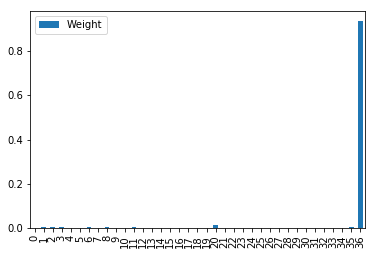

In [152]:
Z.plot(kind='bar')

In [ ]:
######################Gradient Boosting##############################

In [256]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [257]:
Log1=pd.read_csv("CLS_TREE.csv")

In [258]:
X=Log1.drop("Target",axis=1)

In [259]:
Y=Log1["Target"]

In [260]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [261]:
#AmodC=AdaBoostClassifier(n_estimators=160,random_state=400)
AmodC=GradientBoostingClassifier(n_estimators=190,random_state=400)

In [58]:
AmodC.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=190,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [59]:
AmodC.score(X_test,Y_test)

0.7570315742425694

In [18]:
from sklearn.model_selection import GridSearchCV

In [60]:
AmodC1=GridSearchCV(AmodC,param_grid={'N_estima':[170,190,210,230,250,270]})

In [61]:
AmodC1

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=190,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'N_estima': [170, 190, 210, 230, 250, 270]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
#AmodC=AdaBoostClassifier(n_estimators=160,random_state=400)
AmodC=GradientBoostingClassifier(n_estimators=190,random_state=400)

In [63]:
AmodC.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=190,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [64]:
AmodC.feature_importances_

array([0.03214559, 0.09251489, 0.05064137, 0.03989455, 0.0841657 ,
       0.01461559, 0.09303298, 0.03058942, 0.02543312, 0.07751793,
       0.01360754, 0.00086672, 0.04386701, 0.02144917, 0.01571592,
       0.0490418 , 0.02167247, 0.04496506, 0.01469051, 0.04661025,
       0.00551726, 0.09346948, 0.01645548, 0.03837064, 0.03314956])

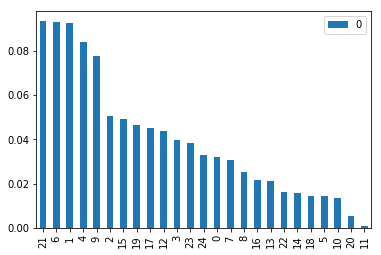

In [65]:
AmodC_fea=pd.DataFrame(pd.Series(AmodC.feature_importances_,index=X.columns)).reset_index().sort_values(by=0,ascending=False).plot(kind='bar')
AmodC_fea

In [49]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

In [84]:
my_plots = plot_partial_dependence(AmodC,features=[0],X,feature_names=['number_accounts_always_satisfactory'])

SyntaxError: positional argument follows keyword argument (<ipython-input-84-672730619d39>, line 1)

In [81]:
###################AdaboostRegressor,GradientBoost Regressor ############################

In [85]:
EQ2=pd.read_csv("ALG_TREE.csv")

In [86]:
EQ2=EQ2.drop(['consumer_id','archive_date','zip_code','trade_id','origination_date_open','deceased_consumer','status_category','date_reported', 'narrcode_1', 'narrcode_2', 'narrcode_3', 'narrcode_4','CITY', 'LATITUDE', 'LONGITUDE', 'COUNTY',
       'hpi_09', 'hpi_10', 'hpi_11', 'UER_0110_PER', 'UER_0210_PER','account_type',
       'UER_0310_PER', 'UER_0410_PER', 'UER_0510_PER', 'UER_0610_PER',
       'UER_0710_PER', 'UER_0810_PER', 'UER_0910_PER', 'UER_1010_PER',
       'UER_1110_PER', 'UER_1210_PER', 'GDP_2009', 'GDP_2010', 'GDP_2011',
       'UER_SW_012010', 'UER_SW_022010', 'UER_SW_032010', 'UER_SW_042010',
       'UER_SW_052010', 'UER_SW_062010', 'UER_SW_072010', 'UER_SW_082010',
       'UER_SW_092010', 'UER_SW_102010', 'UER_SW_112010'],axis=1)

In [88]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [89]:
X=EQ2.drop(['vantage_score_3','state'],axis=1)

In [90]:
X.columns

Index(['inquiries_12_months', 'age_oldest_account',
       'age_oldest_mortgage_account', 'age_newest_account',
       'number_of_accounts', 'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_accounts_past_due', 'total_past_due_amount', 'bankruptcy_flag',
       'foreclosure_flag', 'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'origination_portfolio_type',
       'origination_product_category', 'origination_vantage_score3',
       'product_category', 'pim_score', 'consumer_age', 'mortgage_indicator',
       'terms', 'balance', 'high_credit', 'monthly_payment', 'portfolio_type',
       'transferred_sold_flag', 'new_origination_flag', 'ecoa', 'rate_status

In [91]:
Y=EQ2['vantage_score_3']

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [124]:
#AmodR=AdaBoostRegressor(n_estimators=120,random_state=400)
AmodR=GradientBoostingRegressor(n_estimators=220,random_state=400)

In [125]:
AmodR.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=220, presort='auto', random_state=400,
             subsample=1.0, verbose=0, warm_start=False)

In [126]:
AmodR.score(X_test,Y_test)

0.9661132594770891

In [123]:
sed=GridSearchCV(AmodC,param_grid={'N_estima':[170,190,210,220,230,250,270]})
sed


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=190,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'N_estima': [170, 190, 210, 220, 230, 250, 270]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [127]:
AmodR.feature_importances_

array([0.03054774, 0.05753966, 0.03798159, 0.04067923, 0.03705761,
       0.01149121, 0.0614    , 0.02736746, 0.04347051, 0.03125337,
       0.02498269, 0.06133657, 0.00497273, 0.00528448, 0.02664298,
       0.03218627, 0.04578901, 0.01942493, 0.        , 0.0088929 ,
       0.07462781, 0.00692193, 0.03064488, 0.00964563, 0.00071165,
       0.00072542, 0.02052651, 0.01220807, 0.00218968, 0.00052636,
       0.        , 0.00092983, 0.        , 0.00613777, 0.00521063,
       0.02959276, 0.1911001 ])

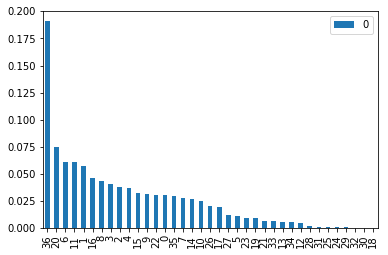

In [129]:
AmodR_fe=pd.DataFrame(pd.Series(AmodR.feature_importances_,index=X.columns)).reset_index().sort_values(by=0,ascending=False).plot(kind='bar')

In [ ]:
########################## Xgboost Classifier ########################################

In [277]:
import xgboost

In [278]:
from xgboost.sklearn import XGBClassifier,XGBRegressor

In [279]:
Log1=pd.read_csv("CLS_TREE.csv")

In [280]:
X=Log1.drop("Target",axis=1)

In [281]:
Y=Log1["Target"]

In [282]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [284]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [285]:
XGmodC=XGBClassifier(n_estimators=190)

In [286]:
XGmodC.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=190,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [287]:
XGmodC.score(X_test,Y_test)

0.7292724196277496

In [288]:
from sklearn.model_selection import GridSearchCV

In [289]:
XGmodC1=GridSearchCV(XGmodC,param_grid={'N_estima':[170,190,210,230,250,270]})

In [290]:
XGmodC1

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=190,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'N_estima': [170, 190, 210, 230, 250, 270]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [291]:
#AmodC=AdaBoostClassifier(n_estimators=160,random_state=400)
XGmodC=XGBClassifier(n_estimators=190,random_state=400)

In [63]:
XGmodC.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=190,
              presort='auto', random_state=400, subsample=1.0, verbose=0,
              warm_start=False)

In [148]:
XGmodC.feature_importances_

array([0.04718876, 0.09317269, 0.05261044, 0.0439759 , 0.07228915,
       0.00903614, 0.08273093, 0.03835341, 0.03413654, 0.06706827,
       0.02188755, 0.00120482, 0.04698795, 0.02329317, 0.01967872,
       0.05060241, 0.02188755, 0.04939759, 0.01546185, 0.05582329,
       0.00321285, 0.06004016, 0.02028112, 0.04056225, 0.02911647],
      dtype=float32)

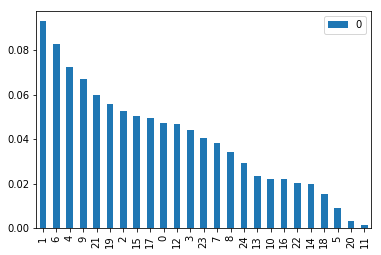

In [149]:
XGmodC_fea=pd.DataFrame(pd.Series(XGmodC.feature_importances_,index=X.columns)).reset_index().sort_values(by=0,ascending=False).plot(kind='bar')
XGmodC_fea

In [ ]:
####################################XGB Regressor ################################

In [152]:
EQ2=pd.read_csv("ALG_TREE.csv")

In [153]:
EQ2=EQ2.drop(['consumer_id','archive_date','zip_code','trade_id','origination_date_open','deceased_consumer','status_category','date_reported', 'narrcode_1', 'narrcode_2', 'narrcode_3', 'narrcode_4','CITY', 'LATITUDE', 'LONGITUDE', 'COUNTY',
       'hpi_09', 'hpi_10', 'hpi_11', 'UER_0110_PER', 'UER_0210_PER','account_type',
       'UER_0310_PER', 'UER_0410_PER', 'UER_0510_PER', 'UER_0610_PER',
       'UER_0710_PER', 'UER_0810_PER', 'UER_0910_PER', 'UER_1010_PER',
       'UER_1110_PER', 'UER_1210_PER', 'GDP_2009', 'GDP_2010', 'GDP_2011',
       'UER_SW_012010', 'UER_SW_022010', 'UER_SW_032010', 'UER_SW_042010',
       'UER_SW_052010', 'UER_SW_062010', 'UER_SW_072010', 'UER_SW_082010',
       'UER_SW_092010', 'UER_SW_102010', 'UER_SW_112010'],axis=1)

In [155]:
X=EQ2.drop(['vantage_score_3','state'],axis=1)

In [156]:
X.columns

Index(['inquiries_12_months', 'age_oldest_account',
       'age_oldest_mortgage_account', 'age_newest_account',
       'number_of_accounts', 'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory',
       'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       'bankcard_accts_over_75_percent_utilization',
       'number_accounts_past_due', 'total_past_due_amount', 'bankruptcy_flag',
       'foreclosure_flag', 'number_3rd_party_collection_accts',
       'total_amount_3rd_party_collections', 'number_open_bankcard_accounts',
       'number_open_mortgage_accounts', 'origination_portfolio_type',
       'origination_product_category', 'origination_vantage_score3',
       'product_category', 'pim_score', 'consumer_age', 'mortgage_indicator',
       'terms', 'balance', 'high_credit', 'monthly_payment', 'portfolio_type',
       'transferred_sold_flag', 'new_origination_flag', 'ecoa', 'rate_status

In [157]:
Y=EQ2['vantage_score_3']

In [159]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [161]:
#AmodR=AdaBoostRegressor(n_estimators=120,random_state=400)
XGmodR=XGBRegressor(n_estimators=220)

In [162]:
XGmodR.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=220, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [163]:
XGmodR.score(X_test,Y_test)

0.9661050259155401

In [164]:
sed=GridSearchCV(XGmodR,param_grid={'N_estima':[170,190,210,220,230,250,270]})
sed


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=220, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'N_estima': [170, 190, 210, 220, 230, 250, 270]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [127]:
XGmodR.feature_importances_

array([0.03054774, 0.05753966, 0.03798159, 0.04067923, 0.03705761,
       0.01149121, 0.0614    , 0.02736746, 0.04347051, 0.03125337,
       0.02498269, 0.06133657, 0.00497273, 0.00528448, 0.02664298,
       0.03218627, 0.04578901, 0.01942493, 0.        , 0.0088929 ,
       0.07462781, 0.00692193, 0.03064488, 0.00964563, 0.00071165,
       0.00072542, 0.02052651, 0.01220807, 0.00218968, 0.00052636,
       0.        , 0.00092983, 0.        , 0.00613777, 0.00521063,
       0.02959276, 0.1911001 ])

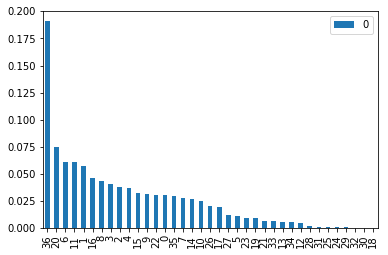

In [165]:
XGmodR_fe=pd.DataFrame(pd.Series(AmodR.feature_importances_,index=X.columns)).reset_index().sort_values(by=0,ascending=False).plot(kind='bar')

In [ ]:
#######################SVM-SVC ############################

In [5]:
Log1=pd.read_csv("CLS_TREE.csv")

In [6]:
X=Log1.drop("Target",axis=1)

In [7]:
Y=Log1["Target"]

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [11]:
from sklearn.svm import SVC,SVR

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
X_train=sc.fit_transform(X_train)

In [15]:
X_test=sc.transform(X_test)

In [16]:
classif=SVC(kernel='linear',random_state=400)

In [18]:
classif.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=400, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
Y_pred=classif.predict(X_test)

In [23]:
cm=confusion_matrix(Y_pred,Y_test)

In [24]:
cm

array([[10955,  5277,   349,  3762],
       [ 1326,  4353,  1496,   163],
       [   13,   650,  1799,     0],
       [ 6844,  1340,    11, 24308]], dtype=int64)

In [28]:
cm1=classification_report(Y_pred,Y_test)
print(cm1)

             precision    recall  f1-score   support

       GOOD       0.57      0.54      0.55     20343
        MOD       0.37      0.59      0.46      7338
       Risk       0.49      0.73      0.59      2462
      VGOOD       0.86      0.75      0.80     32503

avg / total       0.70      0.66      0.67     62646



In [ ]:
########################SVR ##############################

In [33]:
EQ2=pd.read_csv("ALG_TREE.csv")

In [34]:
EQ2=EQ2.drop(['consumer_id','archive_date','zip_code','trade_id','origination_date_open','deceased_consumer','status_category','date_reported', 'narrcode_1', 'narrcode_2', 'narrcode_3', 'narrcode_4','CITY', 'LATITUDE', 'LONGITUDE', 'COUNTY',
       'hpi_09', 'hpi_10', 'hpi_11', 'UER_0110_PER', 'UER_0210_PER','account_type',
       'UER_0310_PER', 'UER_0410_PER', 'UER_0510_PER', 'UER_0610_PER',
       'UER_0710_PER', 'UER_0810_PER', 'UER_0910_PER', 'UER_1010_PER',
       'UER_1110_PER', 'UER_1210_PER', 'GDP_2009', 'GDP_2010', 'GDP_2011',
       'UER_SW_012010', 'UER_SW_022010', 'UER_SW_032010', 'UER_SW_042010',
       'UER_SW_052010', 'UER_SW_062010', 'UER_SW_072010', 'UER_SW_082010',
       'UER_SW_092010', 'UER_SW_102010', 'UER_SW_112010'],axis=1)

In [35]:
X=EQ2.drop(['vantage_score_3','state'],axis=1)

In [36]:
X.columns

Index([u'inquiries_12_months', u'age_oldest_account',
       u'age_oldest_mortgage_account', u'age_newest_account',
       u'number_of_accounts', u'number_accounts_opened_within_12_months',
       u'number_accounts_always_satisfactory',
       u'number_accounts_major_derogatory',
       u'number_revolving_accts_greater_than_or_equal_to_50_percent_utilization',
       u'bankcard_accts_over_75_percent_utilization',
       u'number_accounts_past_due', u'total_past_due_amount',
       u'bankruptcy_flag', u'foreclosure_flag',
       u'number_3rd_party_collection_accts',
       u'total_amount_3rd_party_collections', u'number_open_bankcard_accounts',
       u'number_open_mortgage_accounts', u'origination_portfolio_type',
       u'origination_product_category', u'origination_vantage_score3',
       u'product_category', u'pim_score', u'consumer_age',
       u'mortgage_indicator', u'terms', u'balance', u'high_credit',
       u'monthly_payment', u'portfolio_type', u'transferred_sold_flag',
      

In [37]:
Y=EQ2['vantage_score_3']

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [39]:
X_train=sc.fit_transform(X_train)

In [40]:
X_test=sc.transform(X_test)

In [42]:
Regress=SVR(kernel='linear')

In [43]:
Regress.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
Y_pred=Regress.predict(X_test)

In [46]:
Y_pred

array([796.16231152, 607.90974006, 609.89883778, ..., 740.17673321,
       811.11085185, 750.29992092])

In [47]:
Regress.score(X_train,Y_train)

0.9461379313582068

In [48]:
Regress.score(X_test,Y_test)

0.944835312478356

In [ ]:
################KNN- Classifier###########################

In [49]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [50]:
Log1=pd.read_csv("CLS_TREE.csv")

In [51]:
X=Log1.drop("Target",axis=1)

In [52]:
Y=Log1["Target"]

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc=StandardScaler()

In [56]:
X_train=sc.fit_transform(X_train)

In [57]:
X_test=sc.transform(X_test)

In [62]:
Kclassif=KNeighborsClassifier(metric='minkowski',n_neighbors=7,p=2)

In [64]:
Kclassif.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [65]:
Y_pred=Kclassif.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(Y_pred,Y_test)

0.7656195128180571

In [ ]:
########## KNN -R ####################

In [68]:
EQ2=pd.read_csv("ALG_TREE.csv")

In [69]:
EQ2=EQ2.drop(['consumer_id','archive_date','zip_code','trade_id','origination_date_open','deceased_consumer','status_category','date_reported', 'narrcode_1', 'narrcode_2', 'narrcode_3', 'narrcode_4','CITY', 'LATITUDE', 'LONGITUDE', 'COUNTY',
       'hpi_09', 'hpi_10', 'hpi_11', 'UER_0110_PER', 'UER_0210_PER','account_type',
       'UER_0310_PER', 'UER_0410_PER', 'UER_0510_PER', 'UER_0610_PER',
       'UER_0710_PER', 'UER_0810_PER', 'UER_0910_PER', 'UER_1010_PER',
       'UER_1110_PER', 'UER_1210_PER', 'GDP_2009', 'GDP_2010', 'GDP_2011',
       'UER_SW_012010', 'UER_SW_022010', 'UER_SW_032010', 'UER_SW_042010',
       'UER_SW_052010', 'UER_SW_062010', 'UER_SW_072010', 'UER_SW_082010',
       'UER_SW_092010', 'UER_SW_102010', 'UER_SW_112010'],axis=1)

In [70]:
X=EQ2.drop(['vantage_score_3','state'],axis=1)

In [71]:
Y=EQ2['vantage_score_3']

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.70,random_state=100)

In [73]:
X_train=sc.fit_transform(X_train)

In [74]:
X_test=sc.transform(X_test)

In [75]:
KmodR=KNeighborsRegressor(n_neighbors=7,metric='minkowski',p=2)

In [76]:
KmodR.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [77]:
Y_pred=KmodR.predict(X_test)

In [78]:
KmodR.score(X_test,Y_test)

0.9117657733716903